# Chargement des données

In [17]:
import scipy.io

mat = scipy.io.loadmat('Win120sec-Overlap10sec\\SyncMatrix_dyad11.mat')
mat_data = mat['WTC3DmatrixDyad']
print(mat_data.shape)
mat_data

(6, 6, 16)


array([[[0.14788796, 0.42288036, 0.12336746, 0.20393548, 0.14633153,
         0.48494616, 0.25505863, 0.35392239, 0.35666917, 0.36097551,
         0.14016204, 0.170988  , 0.08749763, 0.08612102, 0.2427944 ,
         0.32896915],
        [0.25156767, 0.26841723, 0.35922565, 0.37971175, 0.60515512,
         0.43198989, 0.27997191, 0.34481433, 0.436859  , 0.40643129,
         0.06448452, 0.28117535, 0.07622952, 0.31360355, 0.22006594,
         0.30084017],
        [0.21042655, 0.30295974, 0.38929025, 0.42024871, 0.55101498,
         0.51062346, 0.25792748, 0.35646673, 0.43960769, 0.37225796,
         0.08502974, 0.16525135, 0.06156328, 0.31067308, 0.2569693 ,
         0.29153687],
        [0.22171618, 0.24964942, 0.29733263, 0.24861346, 0.21578692,
         0.74813841, 0.1910458 , 0.31510468, 0.44597314, 0.17603029,
         0.26799562, 0.26414265, 0.13779307, 0.23770784, 0.19582459,
         0.1363428 ],
        [0.15055627, 0.18375207, 0.19672023, 0.36023904, 0.16435966,
         0.4765

In [18]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jan 10 16:18:22 2025',
 '__version__': '1.0',
 '__globals__': [],
 'INFOS': array([[(array([[120]], dtype=uint8), array([[10]], dtype=uint8), array([[16]], dtype=uint8), MatlabOpaque([(b'', b'MCOS', b'string', array([[3707764736],
                              [         2],
                              [         1],
                              [         1],
                              [         1],
                              [         1]], dtype=uint32))          ],
                      dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]), array([[(array([[2160]], dtype=uint16), array([[7.81]]), array([[16869.6]]), array([[180]], dtype=uint8), array([[1405.8]]), array([[1406]], dtype=uint16), array([[15464]], dtype=uint16), array([[0]], dtype=uint8), array([[1800]], dtype=uint16), array([[937]], dtype=uint16), array([[859]], dtype=uint16))]],
               dtype=[('expeduration', 'O'), ('sf', 'O'

## Concaténation des données

In [19]:
import os
import numpy as np

def load_all_data(directory):
    all_data = []
    for file in os.listdir(directory):
        if file.endswith(".mat"):
            mat = scipy.io.loadmat(os.path.join(directory, file))
            mat_data = mat['WTC3DmatrixDyad']
            all_data.append(mat_data)
    return np.array(all_data)

all_data = load_all_data('Win120sec-Overlap10sec')
all_data.shape

(36, 6, 6, 16)

In [20]:
def all_matrices(data):
    matrices = []
    for i in range(data.shape[0]):
        for j in range(data.shape[3]):
            matrices.append(data[i, :, :, j])
    return np.array(matrices)

all_matrices = all_matrices(all_data)
all_matrices.shape

(576, 6, 6)

# Détermination du nombre de clusters

## Méthode du coude

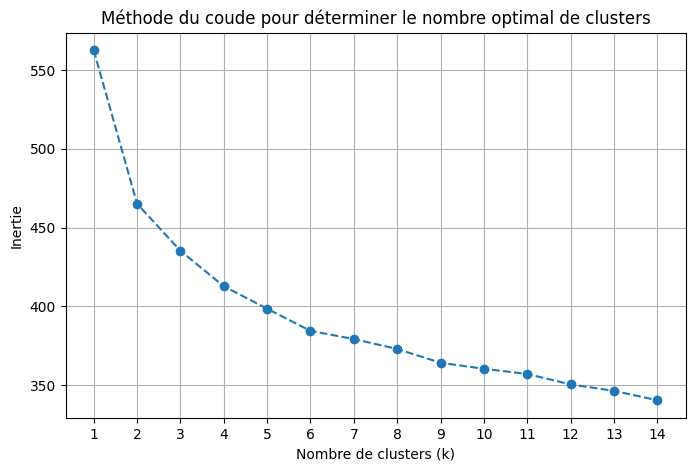

In [21]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Exemple de données (576 matrices 6x6)
data = all_matrices

# Aplatir les matrices 6x6 en vecteurs de 36 dimensions
flattened_data = data.reshape(576, -1)  # Dimensions : (576, 36)

# Normaliser les données
flattened_data_normalized = flattened_data / flattened_data.max()

# Liste pour stocker les valeurs d'inertie
inertia_values = []

# Tester différents nombres de clusters
k_range = range(1, 15)  # Choisir k entre 1 et 14
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(flattened_data_normalized)
    inertia_values.append(kmeans.inertia_)  # Inertie (somme des distances au carré intra-cluster)

# Tracer le graphe de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.xticks(k_range)
plt.grid()
plt.show()


## Méthode de la silhouette

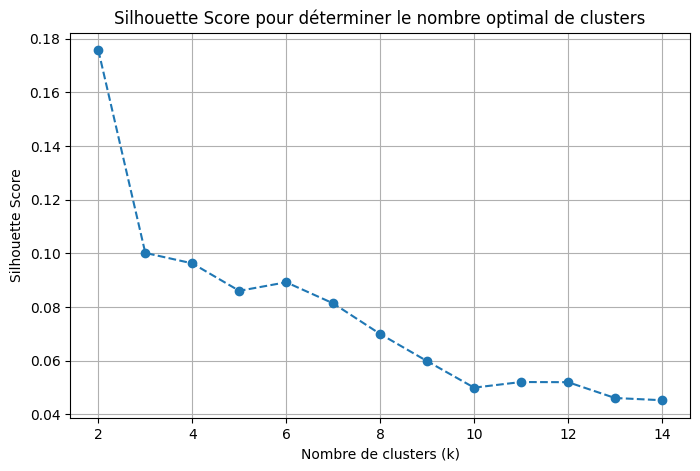

In [22]:
# Utiliser le silhouette score pour déterminer le nombre optimal de clusters
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(flattened_data_normalized)
    silhouette_scores.append(silhouette_score(flattened_data_normalized, cluster_labels))

# Tracer le graphe du silhouette score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Score pour déterminer le nombre optimal de clusters")
plt.grid()

# Clustering et affichage des résultats

## Clustering à l'aide de KMeans

In [23]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Exemple de données (576 matrices 6x6)
data = all_matrices

# Aplatir les matrices 6x6 en vecteurs de 36 dimensions
flattened_data = data.reshape(576, -1)  # Dimensions : (576, 36)

# Normaliser les données
flattened_data_normalized = flattened_data / flattened_data.max()

# Appliquer le k-means avec un nombre de clusters choisi (par exemple, k=4)
k = 6
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(flattened_data_normalized)
labels = kmeans.labels_

## Affichage des centroïdes de chaque cluster

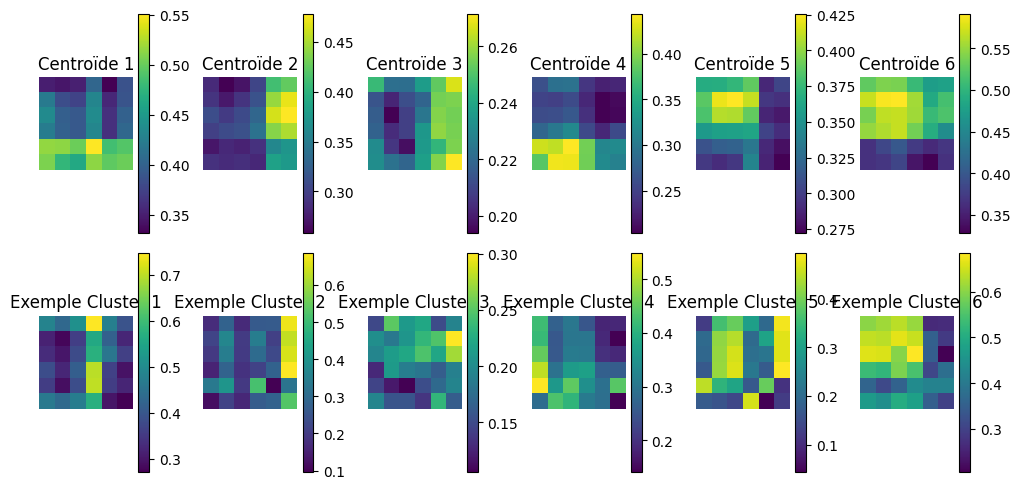

In [24]:
# Reshape des centroïdes en matrices 6x6
centroid_matrices = kmeans.cluster_centers_.reshape(k, 6, 6)

# Visualisation des centroïdes
plt.figure(figsize=(10, 5))
for i in range(k):
    plt.subplot(2, k, i + 1)
    plt.imshow(centroid_matrices[i], cmap='viridis', interpolation='nearest')
    plt.title(f'Centroïde {i+1}')
    plt.colorbar()
    plt.axis('off')

# Visualisation de quelques exemples de matrices par cluster
for i in range(k):
    cluster_indices = np.where(labels == i)[0]  # Indices des matrices dans le cluster i
    example_matrix = data[cluster_indices[0]]  # Exemple de matrice dans ce cluster
    plt.subplot(2, k, k + i + 1)
    plt.imshow(example_matrix, cmap='viridis', interpolation='nearest')
    plt.title(f'Exemple Cluster {i+1}')
    plt.colorbar()
    plt.axis('off')

plt.tight_layout()
plt.show()

## Affichage du nombre de matrices dans chaque cluster

In [25]:
# Compter le nombre de matrices dans chaque cluster
unique, counts = np.unique(labels, return_counts=True)

# Afficher les résultats
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} matrices")


Cluster 0: 53 matrices
Cluster 1: 88 matrices
Cluster 2: 182 matrices
Cluster 3: 92 matrices
Cluster 4: 116 matrices
Cluster 5: 45 matrices


## Affichage d'exemples de matrices présentes dans un cluster particulier

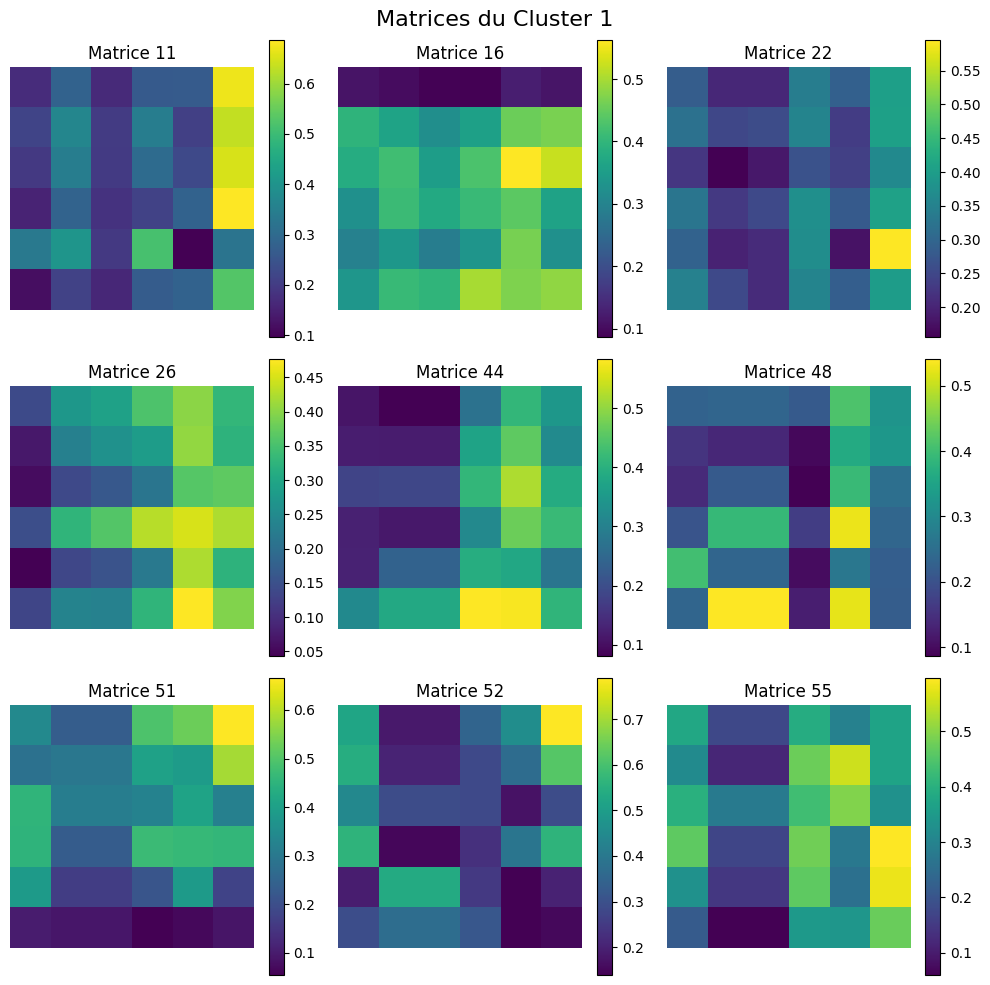

In [26]:
# Choisir un cluster à visualiser (par exemple, cluster 1)
cluster_to_visualize = 1

# Trouver les indices des matrices appartenant au cluster choisi
indices = np.where(labels == cluster_to_visualize)[0]

# Afficher les matrices du cluster
plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices[:9]):  # Limiter l'affichage aux 9 premières matrices
    plt.subplot(3, 3, i + 1)
    plt.imshow(data[idx], cmap='viridis', interpolation='nearest')
    plt.title(f'Matrice {idx}')
    plt.colorbar()
    plt.axis('off')

plt.suptitle(f'Matrices du Cluster {cluster_to_visualize}', fontsize=16)
plt.tight_layout()
plt.show()


## Affichage du silhouette score du clustering considéré

In [27]:
# Mesure de silhouette des clusters
from sklearn.metrics import silhouette_score

# Calculer le score de silhouette
silhouette_avg = silhouette_score(flattened_data, labels)
silhouette_avg

0.08919477221029988

## Réassignation de chaque matrice à sa dyade

In [28]:
# Réassocier les matrices à sa dyades en donnant le numéro du cluster
def assign_clusters_to_dyads(data, labels):
    dyad_clusters = {}
    for i, label in enumerate(labels):
        dyad = i // 16  # 16 matrices par dyade
        if dyad not in dyad_clusters:
            dyad_clusters[dyad] = []
        dyad_clusters[dyad].append(label)
    return dyad_clusters

dyad_clusters = assign_clusters_to_dyads(data, labels)
dyad_clusters


{0: [2, 3, 4, 2, 4, 0, 0, 0, 2, 0, 2, 1, 2, 3, 3, 2],
 1: [1, 5, 2, 2, 2, 4, 1, 4, 4, 4, 1, 5, 4, 4, 4, 3],
 2: [2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 5, 1, 4, 4, 2],
 3: [1, 2, 2, 1, 1, 2, 2, 1, 5, 2, 2, 3, 3, 2, 2, 3],
 4: [2, 3, 1, 1, 1, 1, 4, 4, 2, 3, 1, 3, 1, 1, 2, 3],
 5: [2, 2, 5, 2, 2, 4, 1, 2, 2, 3, 2, 4, 2, 4, 2, 3],
 6: [3, 2, 1, 1, 3, 4, 2, 2, 4, 2, 3, 4, 0, 1, 4, 4],
 7: [4, 4, 0, 2, 4, 5, 2, 3, 1, 1, 4, 2, 0, 2, 0, 0],
 8: [5, 1, 1, 3, 1, 5, 4, 5, 4, 1, 2, 5, 2, 1, 3, 2],
 9: [4, 3, 5, 5, 0, 3, 0, 4, 4, 2, 4, 2, 2, 4, 2, 0],
 10: [1, 0, 2, 2, 4, 1, 2, 3, 2, 0, 2, 4, 2, 0, 3, 3],
 11: [2, 5, 4, 3, 0, 1, 4, 0, 3, 3, 2, 2, 0, 2, 4, 2],
 12: [2, 2, 2, 3, 4, 3, 2, 3, 4, 3, 4, 2, 1, 2, 1, 1],
 13: [1, 2, 2, 2, 3, 2, 4, 0, 4, 1, 4, 2, 4, 4, 3, 2],
 14: [2, 3, 4, 1, 3, 3, 2, 5, 1, 4, 1, 0, 4, 3, 2, 1],
 15: [4, 5, 2, 2, 2, 0, 4, 5, 5, 4, 0, 5, 0, 4, 2, 1],
 16: [2, 1, 0, 3, 2, 4, 1, 1, 2, 4, 1, 0, 2, 3, 0, 5],
 17: [2, 4, 4, 2, 2, 4, 5, 2, 1, 4, 3, 0, 3, 1, 4, 2],
 18: [4, 0, 3, 4, 3,

## Evolution de l'état de synchronisation de chaque dyade en fonction du temps

[   0  120  240  360  480  600  720  840  960 1080 1200 1320 1440 1560
 1680 1800]


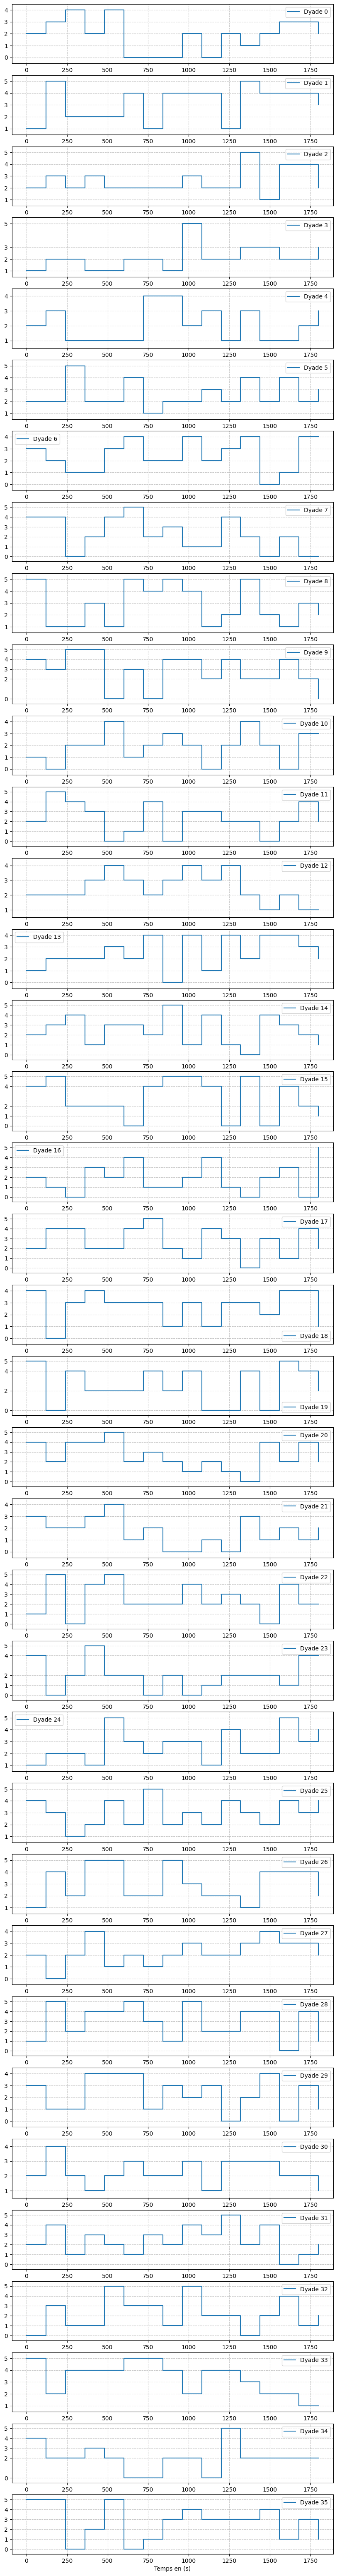

In [ ]:
fig, axes = plt.subplots(len(dyad_clusters), 1, figsize=(10, 80), sharex=False)

step_size = 120
time = np.arange(len(next(iter(dyad_clusters.values()))))*step_size  # Créer l'axe des X

for i, (key, values) in enumerate(dyad_clusters.items()):
    unique_values = sorted(set(values))  # Déterminer les valeurs uniques pour l'axe des Y
    axes[i].step(time, values, where='post', label=f"Dyade {key}")
    axes[i].set_ylim(min(unique_values) - 0.5, max(unique_values) + 0.5)
    axes[i].set_yticks(unique_values)
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend()

plt.xlabel("Temps en (s)")
plt.show()